로이터 데이터셋 로드하기

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

로이터 데이터셋을 텍스트로 디코딩하기

In [14]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [15]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[10]

3

데이터 인코딩하기

In [16]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels= to_one_hot(test_labels)

모델 정의하기

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

모델 컴파일하기

In [19]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', metrics=['accuracy'])

검증 세트 준비하기

In [20]:
x_val=x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

모델 훈련하기

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 142us/sample - loss: 2.5945 - accuracy: 0.5362 - val_loss: 1.6985 - val_accuracy: 0.6500
Epoch 2/20
7982/7982 [==============================] - 1s 86us/sample - loss: 1.3964 - accuracy: 0.7127 - val_loss: 1.2676 - val_accuracy: 0.7280
Epoch 3/20
7982/7982 [==============================] - 1s 89us/sample - loss: 1.0327 - accuracy: 0.7825 - val_loss: 1.1175 - val_accuracy: 0.7650
Epoch 4/20
7982/7982 [==============================] - 1s 87us/sample - loss: 0.8127 - accuracy: 0.8335 - val_loss: 1.0057 - val_accuracy: 0.7930
Epoch 5/20
7982/7982 [==============================] - 1s 88us/sample - loss: 0.6451 - accuracy: 0.8647 - val_loss: 0.9531 - val_accuracy: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 90us/sample - loss: 0.5152 - accuracy: 0.8918 - val_loss: 0.9288 - val_accuracy: 0.8090
Epoch 7/20
7982/7982 [==============================] - 1s 89us/sampl

훈련과 검증 손실 그리기

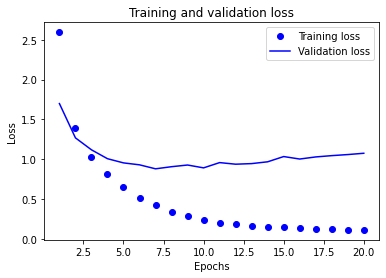

In [29]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

훈련과 검증 정확도 그리기

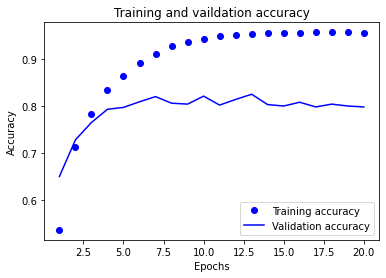

In [35]:
plt.clf()

acc=history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and vaildation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

모델을 처음부터 다시 훈련하기

In [37]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
            loss = 'categorical_crossentropy',
            metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val,y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 149us/sample - loss: 2.6335 - accuracy: 0.5103 - val_loss: 1.7172 - val_accuracy: 0.6400
Epoch 2/9
7982/7982 [==============================] - 1s 95us/sample - loss: 1.3891 - accuracy: 0.7105 - val_loss: 1.2946 - val_accuracy: 0.7040
Epoch 3/9
7982/7982 [==============================] - 1s 92us/sample - loss: 1.0005 - accuracy: 0.7898 - val_loss: 1.0955 - val_accuracy: 0.7550
Epoch 4/9
7982/7982 [==============================] - 1s 88us/sample - loss: 0.7742 - accuracy: 0.8399 - val_loss: 0.9998 - val_accuracy: 0.7920
Epoch 5/9
7982/7982 [==============================] - 1s 85us/sample - loss: 0.6140 - accuracy: 0.8746 - val_loss: 0.9476 - val_accuracy: 0.8000
Epoch 6/9
7982/7982 [==============================] - 1s 85us/sample - loss: 0.4869 - accuracy: 0.8975 - val_loss: 0.9219 - val_accuracy: 0.8050
Epoch 7/9
7982/7982 [==============================] - 1s 86us/sample - los

In [38]:
results

[0.955364071675315, 0.7969724]

랜덤으로 분류했을 때 정확도

In [39]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) ==np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18432769367764915

새로운 데이터에 대해 예측하기

In [42]:
predictions = model.predict(x_test)

In [43]:
predictions[0].shape

(46,)

In [45]:
np.sum(predictions[0])

0.9999997

In [46]:
np.argmax(predictions[0])

3

In [47]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [49]:
model.compile(optimizer='rmsprop',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['acc'])

정보 병목이 있는 모델

In [54]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

In [55]:
model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=128,
         validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 183us/sample - loss: 2.8963 - accuracy: 0.3961 - val_loss: 2.1755 - val_accuracy: 0.4360
Epoch 2/20
7982/7982 [==============================] - 1s 132us/sample - loss: 1.8405 - accuracy: 0.4951 - val_loss: 1.6115 - val_accuracy: 0.6100
Epoch 3/20
7982/7982 [==============================] - 1s 128us/sample - loss: 1.4330 - accuracy: 0.6330 - val_loss: 1.4546 - val_accuracy: 0.6350
Epoch 4/20
7982/7982 [==============================] - 1s 130us/sample - loss: 1.2724 - accuracy: 0.6555 - val_loss: 1.4040 - val_accuracy: 0.6480
Epoch 5/20
7982/7982 [==============================] - 1s 147us/sample - loss: 1.1737 - accuracy: 0.6708 - val_loss: 1.3811 - val_accuracy: 0.6610
Epoch 6/20
7982/7982 [==============================] - 1s 133us/sample - loss: 1.0965 - accuracy: 0.6949 - val_loss: 1.3903 - val_accuracy: 0.6640
Epoch 7/20
7982/7982 [==============================] - 1s 129us